# Phase 3

### SQL Operations

Note: Create a separate table for each file and give a meaningful name.

- When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.

In [ ]:
# !pip install ipython-sql

In [1]:
from pymysql import connect
import pandas as pd
# connect to mysql database
%load_ext sql

In [2]:
# Define your MySQL connection parameters
host = 'localhost'
user = 'root'
passwd = 'S@meera12345'


# Connect to MySQL database
conn = connect(host=host, user=user, password=passwd)
cur = conn.cursor()

In [3]:
cur.execute('DROP DATABASE IF EXISTS crime_against_women')


1

### Create database

In [5]:
cur.execute('CREATE DATABASE crime_against_women CHARACTER SET utf8mb4 COLLATE utf8mb4_unicode_ci')

1

In [6]:
conn.close()

##### Connect to crime_against_women database

In [7]:
conn = connect(host=host, user=user, password=passwd, database = 'crime_against_women')
cur = conn.cursor()

##### Drop table if exists

In [8]:
cur.execute(
'''
DROP TABLE IF EXISTS cat
''')
conn.commit()

##### Create table

In [9]:
cur.execute(
'''
CREATE TABLE IF NOT EXISTS cat

(
StateUT VARCHAR(50),
District VARCHAR(50) PRIMARY KEY,
Year INT,
Rape INT,
KidnappingAbduction INT,
DowryDeaths INT,
Assaulting_women INT,
Insulting_women INT,
Cruelty_by_husband INT,
Importating_girls INT
 )
'''
)

conn.commit()

In [10]:
use_db_query = "USE crime_against_women"
cur.execute(use_db_query)

0

In [11]:
csv_file_path = 'D:\\Python_practice\\Data_Trained\\Crimes_in_India_Project\\42_District_wise_crimes_committed_against_women_2001_2012.csv'

In [12]:
conn = connect(host=host, user=user, password=passwd, local_infile=True)

In [13]:
# Load data from 'cat.csv' into the 'cat' table
load_data_query = """
    LOAD DATA INFILE '42_District_wise_crimes_committed_against_women_2001_2012.csv'
    INTO TABLE cat
    FIELDS TERMINATED BY ','
    ENCLOSED BY '"'
    LINES TERMINATED BY '\r\n'
    IGNORE 1 ROWS;
"""
cur.execute(load_data_query)

# Commit the changes
conn.commit()

##### 3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [14]:
cur.execute('Select * from cat')
row = cur.fetchall()
for r in row:
    print(r)

('West Bengal', '24 Parganas North', 2001, 53, 63, 23, 63, 0, 447, 0)
('West Bengal', '24 Parganas South', 2001, 47, 52, 48, 54, 0, 480, 0)
('A & N Islands', 'A And N Islands', 2007, 3, 9, 1, 21, 2, 18, 0)
('Andhra Pradesh', 'Adilabad', 2001, 50, 30, 16, 149, 34, 175, 0)
('Uttar Pradesh', 'Agra', 2001, 66, 132, 63, 110, 114, 327, 0)
('Gujarat', 'Ahmedabad Commr.', 2001, 39, 117, 7, 54, 27, 530, 0)
('Gujarat', 'Ahmedabad Rural', 2001, 5, 27, 0, 26, 0, 84, 0)
('Maharashtra', 'Ahmednagar', 2001, 44, 25, 0, 74, 2, 496, 0)
('Gujarat', 'Ahwa-Dang', 2001, 1, 1, 0, 2, 0, 2, 0)
('Mizoram', 'Aizawl', 2001, 26, 0, 0, 13, 0, 1, 0)
('Rajasthan', 'Ajmer', 2001, 16, 125, 12, 95, 0, 236, 0)
('Maharashtra', 'Akola', 2001, 15, 14, 2, 109, 7, 189, 0)
('Kerala', 'Alapuzha', 2001, 21, 6, 1, 162, 2, 105, 0)
('Uttar Pradesh', 'Aligarh', 2001, 50, 78, 44, 90, 54, 258, 0)
('Madhya Pradesh', 'Alirajpur', 2008, 41, 14, 1, 37, 1, 7, 0)
('Uttar Pradesh', 'Allahabad', 2001, 42, 75, 56, 85, 105, 226, 0)
('Uttarakhan

##### 3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [15]:
cur.execute('''SELECT StateUT, District, Year, MAX(Rape) AS highest_Rape_count,
            MAX(KidnappingAbduction) AS highest_KidnappingAbduction_count 
            FROM cat GROUP BY StateUT, District, Year ORDER BY GREATEST(MAX(Rape),
            MAX(KidnappingAbduction)) DESC;''')
rows = cur.fetchall()
for row in rows:
    print(row)


('Delhi', 'Delhi Ut Total', 2001, 381, 964)
('Andhra Pradesh', 'Total', 2001, 871, 765)
('Delhi', 'North-West', 2005, 190, 349)
('Delhi', 'North West', 2001, 103, 298)
('Delhi', 'Outer', 2007, 121, 237)
('Rajasthan', 'Bhilwara', 2001, 42, 223)
('Rajasthan', 'Jaipur', 2001, 61, 203)
('West Bengal', 'Bkp Cp', 2012, 36, 201)
('Uttar Pradesh', 'Kanpur Nagar', 2001, 47, 176)
('Rajasthan', 'Chittorgarh', 2001, 67, 169)
('Maharashtra', 'Mumbai Commr.', 2006, 165, 129)
('Delhi', 'North-East', 2005, 106, 151)
('Chhattisgarh', 'Sarguja', 2001, 145, 16)
('Chhattisgarh', 'Durg', 2001, 144, 42)
('Madhya Pradesh', 'Sagar', 2001, 141, 16)
('Uttar Pradesh', 'Lucknow', 2001, 62, 138)
('Uttar Pradesh', 'Agra', 2001, 66, 132)
('Maharashtra', 'Mumbai', 2001, 127, 12)
('Rajasthan', 'Ajmer', 2001, 16, 125)
('Madhya Pradesh', 'Guna', 2001, 124, 15)
('Delhi', 'North East', 2001, 36, 123)
('Delhi', 'South-East', 2008, 61, 123)
('Rajasthan', 'Udaipur', 2001, 43, 118)
('Gujarat', 'Ahmedabad Commr.', 2001, 39, 11

##### 3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [17]:
cur.execute('''SELECT StateUT, District, Year, Min(Rape) AS highest_Rape_count,
            Min(KidnappingAbduction) AS highest_KidnappingAbduction_count 
            FROM cat GROUP BY StateUT, District, Year ORDER BY highest_Rape_count,
            highest_KidnappingAbduction_count DESC;''')
rows = cur.fetchall()
for row in rows:
    print(row)

('Tamil Nadu', 'Thanjavur', 2001, 0, 34)
('Jammu & Kashmir', 'Handwara', 2002, 0, 15)
('Uttarakhand', 'Champawat', 2001, 0, 3)
('Daman & Diu', 'Daman', 2001, 0, 3)
('Haryana', 'Grp', 2001, 0, 2)
('Arunachal Pradesh', 'K/Kumey', 2003, 0, 2)
('Arunachal Pradesh', 'Kameng West', 2001, 0, 2)
('A & N Islands', 'Car', 2012, 0, 1)
('Manipur', 'Chandel', 2001, 0, 1)
('Rajasthan', 'G.R.P.Jodhpur', 2011, 0, 1)
('Delhi', 'I.G.I. Airport', 2001, 0, 1)
('Jammu & Kashmir', 'Kargil', 2001, 0, 1)
('Bihar', 'Katihar Rly.', 2001, 0, 1)
('West Bengal', 'Kharagpur G.R.P.', 2002, 0, 1)
('Jammu & Kashmir', 'Leh', 2001, 0, 1)
('Nagaland', 'Longleng', 2007, 0, 1)
('Manipur', 'Ukhrul', 2001, 0, 1)
('Arunachal Pradesh', 'Upper Dibang Valley', 2003, 0, 1)
('Gujarat', 'W.Rly Ahmedabad', 2011, 0, 1)
('Gujarat', 'W.Rly Vadodara', 2011, 0, 1)
('Sikkim', 'West', 2001, 0, 1)
('Arunachal Pradesh', 'Anjaw', 2009, 0, 0)
('Bihar', 'Arwal', 2001, 0, 0)
('West Bengal', 'Asansol', 2001, 0, 0)
('Assam', 'Bieo', 2012, 0, 0)
('

##### 3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [18]:
from pymysql import connect
import pandas as pd
# connect to mysql database
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [19]:
# Define your MySQL connection parameters
host = 'localhost'
user = 'root'
passwd = 'S@meera12345'


# Connect to MySQL database
conn = connect(host=host, user=user, password=passwd)
cur = conn.cursor()

In [20]:
cur.execute('DROP DATABASE IF EXISTS crime_against_ST')

1

In [22]:
cur.execute('CREATE DATABASE crime_against_ST CHARACTER SET utf8mb4 COLLATE utf8mb4_unicode_ci')

1

In [23]:
conn = connect(host=host, user=user, password=passwd, database = 'crime_against_ST')
cur = conn.cursor()

In [24]:
cur.execute(
'''
DROP TABLE IF EXISTS ST
''')
conn.commit()

In [25]:
cur.execute(
'''
CREATE TABLE IF NOT EXISTS ST

(
StateUT VARCHAR(50),
District VARCHAR(50) PRIMARY KEY,
Year INT,
Murder INT,
Rape INT,
KidnappingAbduction INT,
Dacoity INT,
Robbery INT,
Arson INT,
Hurt INT,
Protection_Civil_Rights_Act INT,
Prevention_atrocities_Act INT,
Other_Crimes_Against_ST INT
 )
'''
)

conn.commit()

In [26]:
use_db_query = "USE crime_against_ST"
cur.execute(use_db_query)

0

In [27]:
csv_file_path = 'D:\\Python_practice\\Data_Trained\\Crimes_in_India_Project\\02_District_wise_crimes_committed_against_ST_2001_2012.csv'

In [28]:
conn = connect(host=host, user=user, password=passwd, local_infile=True)

In [29]:
# Load data from 'cat.csv' into the 'cat' table
load_data_query = """
    LOAD DATA INFILE '02_District_wise_crimes_committed_against_ST_2001_2012.csv'
    INTO TABLE ST
    FIELDS TERMINATED BY ','
    ENCLOSED BY '"'
    LINES TERMINATED BY '\r\n'
    IGNORE 1 ROWS;
"""
cur.execute(load_data_query)

# Commit the changes
conn.commit()

##### 3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

In [39]:
cur.execute('''
    SELECT
        District,
        MAX(Dacoity) AS highest_Dacoity_count,
        MAX(Robbery) AS highest_Robbery_count
    FROM
        ST
    GROUP BY
        District
    ORDER BY
        highest_Dacoity_count,
        highest_Robery_count DESC;
''')

rows = cur.fetchall()

for row in rows:
    print(row)


('Mon', 0, 3)
('Ranchi', 0, 3)
('N.C.Hills', 0, 2)
('Wokha', 0, 2)
('Bilaspur', 0, 1)
('Datiya', 0, 1)
('Garhwa', 0, 1)
('Himatnagar', 0, 1)
('Khowai', 0, 1)
('Mahasamund', 0, 1)
('Malkangir', 0, 1)
('Mandla', 0, 1)
('Nowrangpur', 0, 1)
('Sarguja', 0, 1)
('Satna', 0, 1)
('24 Parganas North', 0, 0)
('24 Parganas South', 0, 0)
('A And N Islands', 0, 0)
('Adilabad', 0, 0)
('Agra', 0, 0)
('Ahmedabad Commr.', 0, 0)
('Ahmedabad Rural', 0, 0)
('Ahmednagar', 0, 0)
('Ahwa-Dang', 0, 0)
('Aizawl', 0, 0)
('Ajmer', 0, 0)
('Akola', 0, 0)
('Alapuzha', 0, 0)
('Aligarh', 0, 0)
('Alirajpur', 0, 0)
('Allahabad', 0, 0)
('Almora', 0, 0)
('Alwar', 0, 0)
('Ambala', 0, 0)
('Ambala Rural', 0, 0)
('Ambala Urban', 0, 0)
('Ambedkar Nagar', 0, 0)
('Amravati Commr.', 0, 0)
('Amravati Rural', 0, 0)
('Amreli', 0, 0)
('Amritsar', 0, 0)
('Amritsar Rural', 0, 0)
('Anand', 0, 0)
('Anantapur', 0, 0)
('Anantnag', 0, 0)
('Andaman', 0, 0)
('Angul', 0, 0)
('Anjaw', 0, 0)
('Anuppur', 0, 0)
('Araria', 0, 0)
('Ariyalur', 0, 0)
(

##### 3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

In [43]:
cur.execute('''
    SELECT
        District,
        MIN(Murder) AS lowest_Murder_count
    FROM
        ST
    GROUP BY
        District
    ORDER BY
        lowest_Murder_count;
''')

rows = cur.fetchall()

for row in rows:
    print(row) 

('24 Parganas North', 0)
('24 Parganas South', 0)
('A And N Islands', 0)
('Adilabad', 0)
('Agra', 0)
('Ahmedabad Commr.', 0)
('Ahmedabad Rural', 0)
('Ahwa-Dang', 0)
('Aizawl', 0)
('Ajmer', 0)
('Akola', 0)
('Alapuzha', 0)
('Alirajpur', 0)
('Allahabad', 0)
('Almora', 0)
('Alwar', 0)
('Ambala', 0)
('Ambala Rural', 0)
('Ambala Urban', 0)
('Ambedkar Nagar', 0)
('Amravati Commr.', 0)
('Amravati Rural', 0)
('Amreli', 0)
('Amritsar', 0)
('Amritsar Rural', 0)
('Anand', 0)
('Anantapur', 0)
('Anantnag', 0)
('Andaman', 0)
('Angul', 0)
('Anjaw', 0)
('Anuppur', 0)
('Ariyalur', 0)
('Arwal', 0)
('Asansol', 0)
('Ashok Nagar', 0)
('Auraiya', 0)
('Aurangabad', 0)
('Aurangabad Commr.', 0)
('Aurangabad Rural', 0)
('Awantipora', 0)
('Azamgarh', 0)
('Badaun', 0)
('Baddipolicedist', 0)
('Bagaha', 0)
('Bagalkot', 0)
('Bageshwar', 0)
('Baghpat', 0)
('Bahraich', 0)
('Baksa', 0)
('Balasore', 0)
('Ballia', 0)
('Balod', 0)
('Baloda Bazar', 0)
('Balrampur', 0)
('Banda', 0)
('Bandipora', 0)
('Bangalore Commr.', 0)
('

##### 3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.

In [44]:
cur.execute('''SELECT  District, count(Murder) , Year
            FROM ST GROUP BY District, Year
            ORDER BY (count(Murder)) ,Year;''')
rows = cur.fetchall()
for row in rows:
    print(row)

('24 Parganas North', 1, 2001)
('24 Parganas South', 1, 2001)
('Adilabad', 1, 2001)
('Agra', 1, 2001)
('Ahmedabad Commr.', 1, 2001)
('Ahmedabad Rural', 1, 2001)
('Ahmednagar', 1, 2001)
('Ahwa-Dang', 1, 2001)
('Aizawl', 1, 2001)
('Ajmer', 1, 2001)
('Akola', 1, 2001)
('Alapuzha', 1, 2001)
('Aligarh', 1, 2001)
('Allahabad', 1, 2001)
('Almora', 1, 2001)
('Alwar', 1, 2001)
('Ambala', 1, 2001)
('Ambedkar Nagar', 1, 2001)
('Amravati Commr.', 1, 2001)
('Amravati Rural', 1, 2001)
('Amreli', 1, 2001)
('Amritsar', 1, 2001)
('Anand', 1, 2001)
('Anantapur', 1, 2001)
('Anantnag', 1, 2001)
('Andaman', 1, 2001)
('Angul', 1, 2001)
('Araria', 1, 2001)
('Ariyalur', 1, 2001)
('Arwal', 1, 2001)
('Asansol', 1, 2001)
('Auraiya', 1, 2001)
('Aurangabad', 1, 2001)
('Aurangabad Commr.', 1, 2001)
('Aurangabad Rural', 1, 2001)
('Awantipora', 1, 2001)
('Azamgarh', 1, 2001)
('Badaun', 1, 2001)
('Bagaha', 1, 2001)
('Bagalkot', 1, 2001)
('Bageshwar', 1, 2001)
('Baghpat', 1, 2001)
('Bahraich', 1, 2001)
('Balaghat', 1, 

###### 3.8.1 Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table6

In [1]:
from pymysql import connect
import pandas as pd
# connect to mysql database
%load_ext sql

In [2]:
# Define your MySQL connection parameters
host = 'localhost'
user = 'root'
passwd = 'S@meera12345'


# Connect to MySQL database
conn = connect(host=host, user=user, password=passwd)
cur = conn.cursor()

In [4]:
cur.execute('DROP DATABASE IF EXISTS crime_committed')

0

In [5]:
cur.execute('CREATE DATABASE crime_committed CHARACTER SET utf8mb4 COLLATE utf8mb4_unicode_ci')

1

In [6]:
conn = connect(host=host, user=user, password=passwd, database = 'crime_committed')
cur = conn.cursor()

In [7]:
cur.execute(
'''
DROP TABLE IF EXISTS crimes_committed
''')
conn.commit()

In [16]:
cur.execute(
'''
CREATE TABLE IF NOT EXISTS crimes_committed

(
StateUT VARCHAR(50),
District VARCHAR(50) PRIMARY KEY,
Year INT,
Murder INT,
AttemptToMurder INT,
Rape INT

 )
'''
)

conn.commit()

In [17]:
use_db_query = "USE crime_committed"
cur.execute(use_db_query)

0

In [18]:
csv_file_path = 'D:\\Python_practice\\Data_Trained\\Crimes_in_India_Project\\01_District_wise_crimes_committed_IPC_2001_2012.csv'

In [19]:
conn = connect(host=host, user=user, password=passwd, local_infile=True)

In [20]:
load_data_query = """
    LOAD DATA INFILE '01_District_wise_crimes_committed_IPC_2001_2012.csv'
    INTO TABLE crimes_committed
    FIELDS TERMINATED BY ','
    ENCLOSED BY '"'
    LINES TERMINATED BY '\r\n'
    IGNORE 1 ROWS;
"""
cur.execute(load_data_query)

# Commit the changes
conn.commit()

In [22]:
cur.execute('Select * from crimes_committed')
rows = cur.fetchall()
for row in rows:
    print(row)

('West Bengal', '24 Parganas North', 2001, 202, 23, 53)
('West Bengal', '24 Parganas South', 2001, 107, 5, 47)
('A & N Islands', 'A And N Islands', 2007, 15, 19, 3)
('Andhra Pradesh', 'Adilabad', 2001, 101, 60, 50)
('Uttar Pradesh', 'Agra', 2001, 153, 162, 66)
('Gujarat', 'Ahmedabad Commr.', 2001, 90, 58, 39)
('Gujarat', 'Ahmedabad Rural', 2001, 26, 17, 5)
('Maharashtra', 'Ahmednagar', 2001, 97, 41, 44)
('Gujarat', 'Ahwa-Dang', 2001, 6, 0, 1)
('Mizoram', 'Aizawl', 2001, 12, 6, 26)
('Rajasthan', 'Ajmer', 2001, 39, 47, 16)
('Maharashtra', 'Akola', 2001, 64, 41, 15)
('Kerala', 'Alapuzha', 2001, 22, 32, 21)
('Uttar Pradesh', 'Aligarh', 2001, 229, 242, 50)
('Madhya Pradesh', 'Alirajpur', 2008, 59, 40, 41)
('Uttar Pradesh', 'Allahabad', 2001, 167, 224, 42)
('Uttarakhand', 'Almora', 2001, 18, 12, 4)
('Rajasthan', 'Alwar', 2001, 85, 83, 34)
('Haryana', 'Ambala', 2001, 26, 23, 11)
('Haryana', 'Ambala Rural', 2012, 13, 15, 11)
('Haryana', 'Ambala Urban', 2012, 15, 16, 21)
('Uttar Pradesh', 'Ambe

###### 3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [27]:
cur.execute('''
            SELECT StateUT, Year, District, MAX(Murder) AS highest_count_Murder
            FROM crimes_committed
            GROUP BY District, Year ORDER BY highest_count_Murder Desc;
           ''')

rows = cur.fetchall()
for row in rows:
    print(row)

('Andhra Pradesh', 2001, 'Total', 2602)
('Delhi Ut', 2001, 'Delhi Ut Total', 547)
('Bihar', 2001, 'Patna', 434)
('Uttar Pradesh', 2001, 'Muzaffarnagar', 324)
('Maharashtra', 2001, 'Mumbai', 295)
('Uttar Pradesh', 2001, 'Meerut', 275)
('Uttar Pradesh', 2001, 'Bareilly', 272)
('Uttar Pradesh', 2001, 'Bulandshahar', 250)
('Jharkhand', 2001, 'Ranchi', 243)
('Uttar Pradesh', 2001, 'Etah', 240)
('Uttar Pradesh', 2001, 'Badaun', 239)
('Maharashtra', 2006, 'Mumbai Commr.', 239)
('Uttar Pradesh', 2001, 'Ghaziabad', 230)
('Uttar Pradesh', 2001, 'Aligarh', 229)
('Karnataka', 2001, 'Bangalore Commr.', 221)
('Andhra Pradesh', 2001, 'Ranga Reddy', 214)
('Uttar Pradesh', 2001, 'Moradabad', 213)
('Uttar Pradesh', 2001, 'Kanpur Nagar', 210)
('Bihar', 2001, 'Nalanda', 208)
('West Bengal', 2001, '24 Parganas North', 202)
('Bihar', 2001, 'Gaya', 200)
('Uttar Pradesh', 2001, 'Shahjahanpur', 196)
('Andhra Pradesh', 2001, 'Guntur', 182)
('Uttar Pradesh', 2001, 'Hardoi', 182)
('Uttar Pradesh', 2001, 'Khiri', 

###### 3.8.3 Store the above data (the result of 3.8.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [38]:
cur.execute('''
    SELECT
        StateUT, District, Year, MAX(Murder) AS highest_murder_count
    FROM
        crimes_committed
    GROUP BY
        StateUT, District, Year
    ORDER BY
        highest_Murder_count;
''')

result = pd.DataFrame(cur.fetchall(), columns=['StateUT','District',' Year', 'highest_murder_count'])
result.sort_values(by='highest_murder_count', ascending=False)

,StateUT,District,Year,highest_murder_count
807,Andhra Pradesh,Total,2001,2602
806,Delhi Ut,Delhi Ut Total,2001,547
805,Bihar,Patna,2001,434
804,Uttar Pradesh,Muzaffarnagar,2001,324
803,Maharashtra,Mumbai,2001,295
...,...,...,...,...
16,Delhi Ut,S.T.F.,2001,0
17,Delhi Ut,Spl Cell,2002,0
18,Delhi Ut,Stf,2006,0
19,Tamil Nadu,Trichy Rly.,2001,0


- Andhra Pradesh (Total), 2001: Recorded the highest murder count of 2602 in 2001, indicating a significant level of violent crime for that year.

- Delhi Ut (Delhi Ut Total), 2001: Reported a substantial murder count of 547 in 2001, highlighting a notable level of criminal activity.

- Bihar (Patna), 2001: Experienced a high murder count of 434 in 2001, suggesting a considerable impact on the district's safety.

- Uttar Pradesh (Muzaffarnagar), 2001: Registered a murder count of 324 in 2001, indicating a notable level of violent incidents.

- Maharashtra (Mumbai), 2001: Notably, Mumbai reported a murder count of 295 in 2001, reflecting the complex nature of crime even in metropolitan areas.

It's noteworthy that several districts, including Delhi Ut (S.T.F.), Delhi Ut (Spl Cell), Delhi Ut (Stf), and Tamil Nadu (Trichy Rly.), reported zero murders in certain years, highlighting potential variations in crime rates across different regions and time periods.

######  3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

In [42]:
df= result

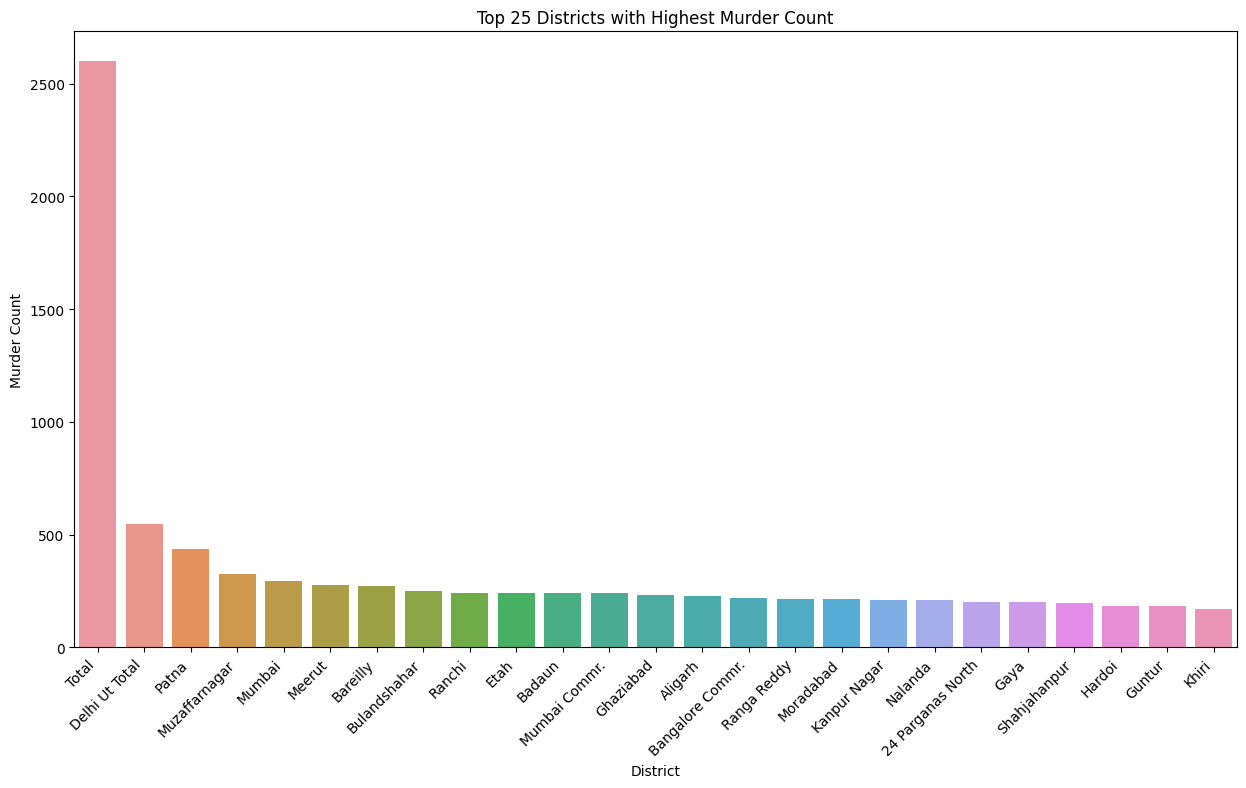

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values(by='highest_murder_count', ascending=False)

top_25_districts = df_sorted.head(25)

plt.figure(figsize=(15, 8))
sns.barplot(data=top_25_districts, x='District', y='highest_murder_count', errorbar=None)

plt.title('Top 25 Districts with Highest Murder Count')
plt.xlabel('District')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Murder Count')
plt.show()


- The visual representation indicates that Delhi UT Total has the highest murder count among districts with a significant population of Scheduled Tribes (ST) people. Following closely is Patna in Bihar, ranking as the second-highest, while Muzaffarnagar in Uttar Pradesh stands as the third highest. The graph further illustrates that districts like Mumbai and Meerut in Madhya Pradesh hold subsequent positions in terms of murder counts.

- Furthermore, it is evident from the graph that a majority of districts with elevated murder counts are situated in states like Bihar, Uttar Pradesh, Madhya Pradesh, Chhattisgarh, Jharkhand, Orissa, and Madhya Pradesh. These states are characterized by a substantial population of ST individuals. On the contrary, districts with lower murder counts are observed in states such as Kerala, Tamil Nadu, West Bengal, and Rajasthan, where the ST population is relatively lower.

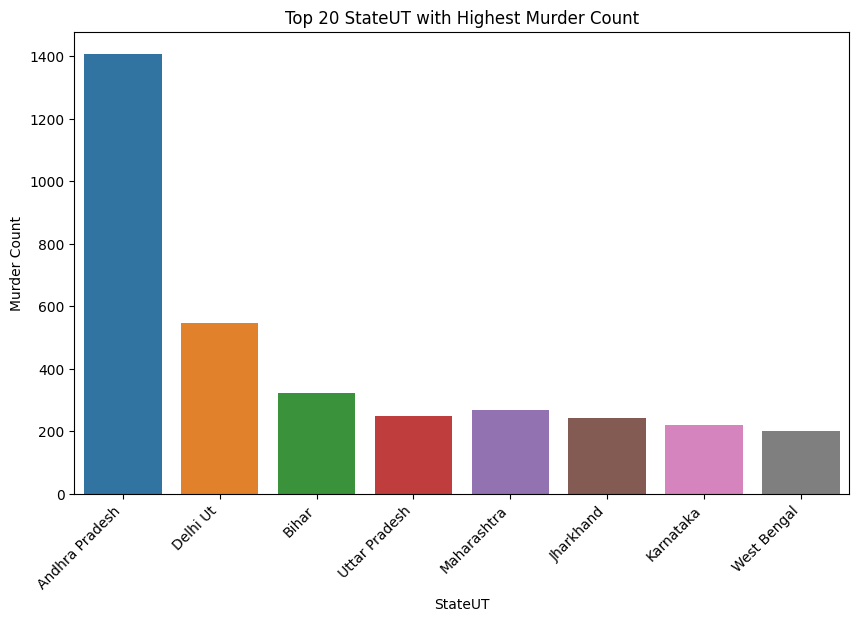

In [85]:
df_sorted = df.sort_values(by='highest_murder_count', ascending=False)

top_20_statesUT = df_sorted.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_statesUT, x='StateUT', y='highest_murder_count', errorbar=None)

plt.title('Top 20 StateUT with Highest Murder Count')
plt.xlabel('StateUT')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Murder Count')
plt.show()

- Andhra Pradesh, Delhi Ut, Bihar, Uttar Pradesh, and Maharashtra have appeared multiple times with high murder counts. 

In [90]:
data = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [92]:
data['YEAR'].value_counts()

YEAR
2001    668
2012     23
2008     21
2011     20
2006     18
2010     17
2003     13
2005     11
2002      6
2007      6
2009      4
2004      1
Name: count, dtype: int64

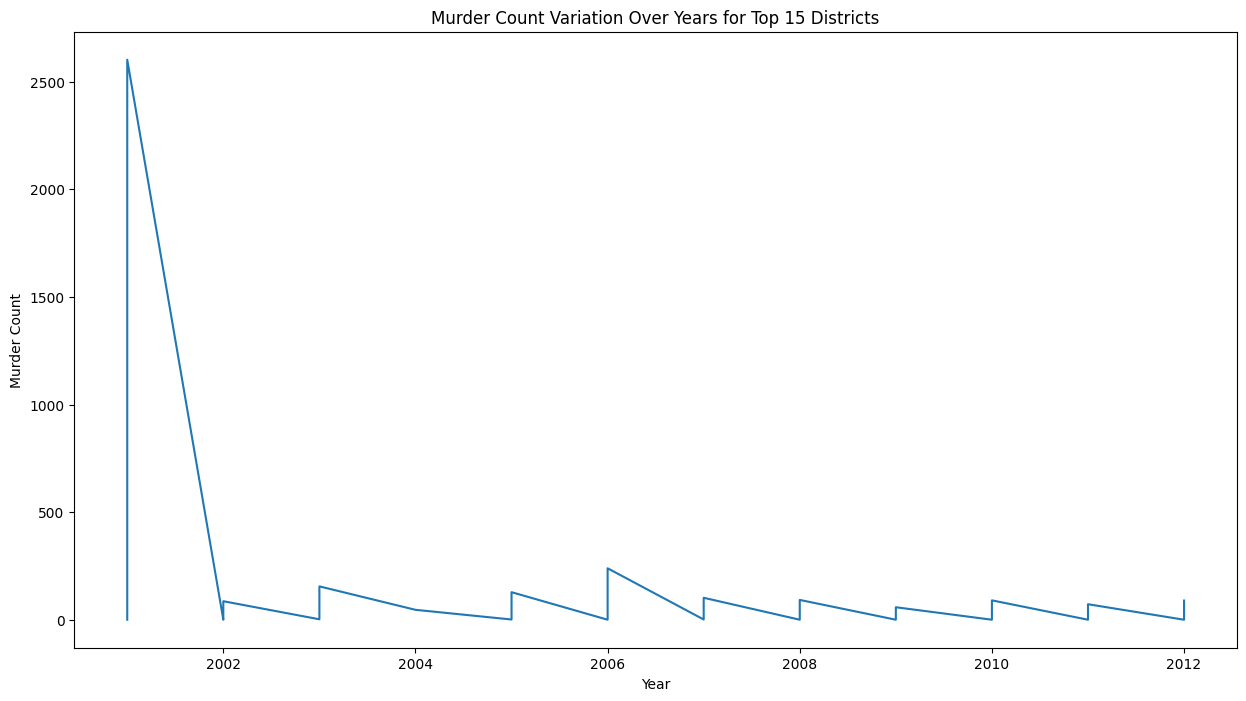

In [100]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=data, x='YEAR', y='MURDER', estimator=None)

plt.title('Murder Count Variation Over Years for Top 15 Districts')
plt.xlabel('Year')
plt.ylabel('Murder Count')
plt.show()

The total crime count exhibited a decline in 2003, followed by a stabilization period. However, from 2006 to 2008, there was a noticeable increase, which then stabilized until 2012. This year-on-year analysis suggests that while there was an initial improvement in 2003, subsequent years witnessed fluctuations, indicating the need for a closer examination of the factors contributing to the variations in crime rates during these periods.